# PFGAP vs KNN Results Analysis
This notebook analyzes experimental results from the PFGAP vs KNN testing pipeline by calling analysis functions in separate cells.

## 1. Import Required Libraries
Import the analyze_results module and other necessary libraries for the analysis workflow.

In [1]:
# Import the analyze_results module and necessary libraries
import analyze_results
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import seaborn as sns
from datetime import datetime

# Set up matplotlib for inline plots
%matplotlib inline

# Set seaborn style for better plots
sns.set_style("whitegrid")

print("✓ All libraries imported successfully")

✓ All libraries imported successfully


## 2. Load Experimental Results
Load the summary and seed results from the results directory using the load_results function.

In [2]:
# Load all experimental results
summary, seed_results = analyze_results.load_results()

if seed_results:
    print(f"\n📊 Successfully loaded results for {len(seed_results)} seeds")
    print(f"Seeds analyzed: {list(seed_results.keys())}")
else:
    print("⚠️ No results found! Make sure the results directory exists and contains data.")

✓ Loaded pipeline summary
✓ Loaded 10 seed results

📊 Successfully loaded results for 10 seeds
Seeds analyzed: ['161', '737', '102', '821', '61', '2', '346', '982', '67', '78']


# Visualizations

In [ ]:
# Convert dict to DataFrame, drop unwanted columns, and expand dictionaries
df = pd.DataFrame.from_dict(seed_results, orient='index')
knn_df = df[["knn_results", "seed"]]
pfgap_df = df[["pfgap_euclidean", "seed"]]

# Expand dictionary columns (first level: knn_results_k*)
for col in knn_df.columns:
    if knn_df[col].apply(lambda x: isinstance(x, dict)).any():
        expanded = knn_df[col].apply(pd.Series)
        expanded = expanded.add_prefix(f"{col}_")
        knn_df = pd.concat([knn_df.drop(columns=[col]), expanded], axis=1)

# Expand dictionary columns again (second level: metrics inside each k)
for col in knn_df.columns:
    if knn_df[col].apply(lambda x: isinstance(x, dict)).any():
        expanded = knn_df[col].apply(pd.Series)
        expanded = expanded.add_prefix(f"{col}_")
        knn_df = pd.concat([knn_df.drop(columns=[col]), expanded], axis=1)

for col in pfgap_df.columns:
    if pfgap_df[col].apply(lambda x: isinstance(x, dict)).any():
        expanded = pfgap_df[col].apply(pd.Series)
        expanded = expanded.add_prefix(f"{col}_")
        pfgap_df = pd.concat([pfgap_df.drop(columns=[col]), expanded], axis=1)

pfgap_df = pfgap_df.drop(columns=[col for col in pfgap_df.columns if col == "pfgap_euclidean_0" or col.endswith("_classification_report")])
knn_df = knn_df.drop(columns=[col for col in knn_df.columns if col.endswith("_classification_report")])

# Drop rows where all main metrics are NaN (except 'seed')
pfgap_df = pfgap_df.dropna(subset=[
    "pfgap_euclidean_accuracy",
    "pfgap_euclidean_f1_score",
    "pfgap_euclidean_precision",
    "pfgap_euclidean_recall"
], how="all")
knn_df

,seed,knn_results_k1_accuracy,knn_results_k1_f1_score,knn_results_k1_precision,knn_results_k1_recall,knn_results_k1_confusion_matrix,knn_results_k4_accuracy,knn_results_k4_f1_score,knn_results_k4_precision,knn_results_k4_recall,...,knn_results_k16_accuracy,knn_results_k16_f1_score,knn_results_k16_precision,knn_results_k16_recall,knn_results_k16_confusion_matrix,knn_results_k20_accuracy,knn_results_k20_f1_score,knn_results_k20_precision,knn_results_k20_recall,knn_results_k20_confusion_matrix
161,161,0.989011,0.989011,0.989250,0.989011,"[[45, 1], [0, 45]]",0.989011,0.989011,0.989250,0.989011,...,0.989011,0.989011,0.989250,0.989011,"[[45, 1], [0, 45]]",0.989011,0.989011,0.989250,0.989011,"[[45, 1], [0, 45]]"
737,737,0.813187,0.812916,0.814420,0.813187,"[[35, 10], [7, 39]]",0.835165,0.834766,0.839453,0.835165,...,0.835165,0.835045,0.836746,0.835165,"[[39, 6], [9, 37]]",0.824176,0.824133,0.824888,0.824176,"[[38, 7], [9, 37]]"
102,102,1.000000,1.000000,1.000000,1.000000,"[[46, 0], [0, 45]]",1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,"[[46, 0], [0, 45]]",1.000000,1.000000,1.000000,1.000000,"[[46, 0], [0, 45]]"
821,821,1.000000,1.000000,1.000000,1.000000,"[[45, 0], [0, 46]]",1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,"[[45, 0], [0, 46]]",1.000000,1.000000,1.000000,1.000000,"[[45, 0], [0, 46]]"
61,61,0.956044,0.956033,0.956947,0.956044,"[[44, 1], [3, 43]]",0.989011,0.989011,0.989250,0.989011,...,0.978022,0.978006,0.978938,0.978022,"[[43, 2], [0, 46]]",0.978022,0.978006,0.978938,0.978022,"[[43, 2], [0, 46]]"
2,2,1.000000,1.000000,1.000000,1.000000,"[[46, 0], [0, 45]]",1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,"[[46, 0], [0, 45]]",1.000000,1.000000,1.000000,1.000000,"[[46, 0], [0, 45]]"
346,346,0.989011,0.989011,0.989250,0.989011,"[[45, 1], [0, 45]]",1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,"[[46, 0], [0, 45]]",1.000000,1.000000,1.000000,1.000000,"[[46, 0], [0, 45]]"
982,982,0.989011,0.989011,0.989250,0.989011,"[[45, 1], [0, 45]]",1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,"[[46, 0], [0, 45]]",1.000000,1.000000,1.000000,1.000000,"[[46, 0], [0, 45]]"
67,67,1.000000,1.000000,1.000000,1.000000,"[[45, 0], [0, 46]]",1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,"[[45, 0], [0, 46]]",1.000000,1.000000,1.000000,1.000000,"[[45, 0], [0, 46]]"
78,78,0.692308,0.690738,0.695266,0.692308,"[[28, 17], [11, 35]]",0.692308,0.691861,0.694102,0.692308,...,0.670330,0.670091,0.670500,0.670330,"[[29, 16], [14, 32]]",0.692308,0.691562,0.693508,0.692308,"[[29, 16], [12, 34]]"


In [ ]:
pfgap_df

,seed,pfgap_euclidean_accuracy,pfgap_euclidean_f1_score,pfgap_euclidean_precision,pfgap_euclidean_recall,pfgap_euclidean_confusion_matrix
737,737,0.813187,0.813187,0.813383,0.813187,"[[37, 8], [9, 37]]"
821,821,0.516484,0.516367,0.516749,0.516484,"[[24, 21], [23, 23]]"
982,982,0.538462,0.538462,0.538462,0.538462,"[[25, 21], [21, 24]]"
67,67,0.538462,0.538350,0.538759,0.538462,"[[25, 20], [22, 24]]"
78,78,0.307692,0.304166,0.304241,0.307692,"[[17, 28], [35, 11]]"


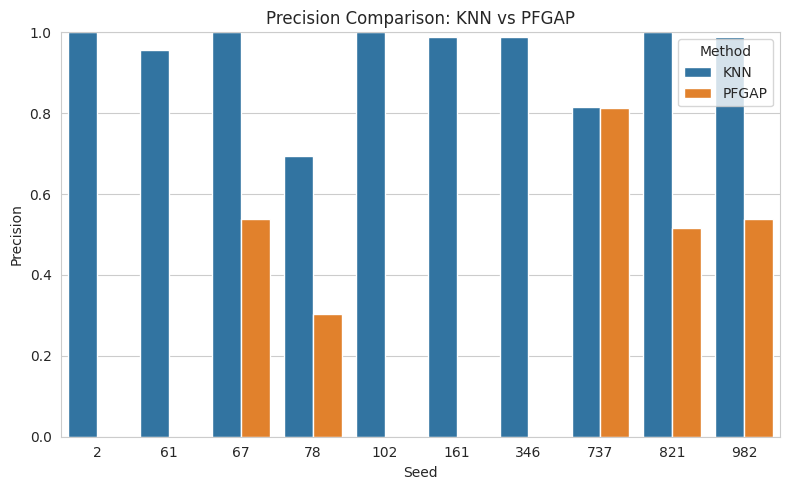

In [ ]:
def plot_metric_comparison(metric: str):
    """
    Plots the given metric ('accuracy', 'precision', 'f1', 'recall') for both KNN and PFGAP across seeds.

    Args:
        metric (str): One of 'accuracy', 'precision', 'f1', 'recall'.
    """
    metric = metric.lower()
    metric_map = {
        "accuracy": ("knn_results_k1_accuracy", "pfgap_euclidean_accuracy"),
        "precision": ("knn_results_k1_precision", "pfgap_euclidean_precision"),
        "f1": ("knn_results_k1_f1_score", "pfgap_euclidean_f1_score"),
        "recall": ("knn_results_k1_recall", "pfgap_euclidean_recall"),
    }
    if metric not in metric_map:
        raise ValueError(f"Metric '{metric}' not recognized. Choose from {list(metric_map.keys())}.")

    knn_col, pfgap_col = metric_map[metric]

    # Prepare data for plotting
    knn_plot = knn_df[["seed", knn_col]].copy()
    knn_plot["method"] = "KNN"
    knn_plot = knn_plot.rename(columns={knn_col: "score"})

    pfgap_plot = pfgap_df[["seed", pfgap_col]].copy()
    pfgap_plot["method"] = "PFGAP"
    pfgap_plot = pfgap_plot.rename(columns={pfgap_col: "score"})

    plot_df = pd.concat([knn_plot, pfgap_plot], ignore_index=True)

    plt.figure(figsize=(8, 5))
    sns.barplot(data=plot_df, x="seed", y="score", hue="method")
    plt.title(f"{metric.capitalize()} Comparison: KNN vs PFGAP")
    plt.ylabel(metric.capitalize())
    plt.xlabel("Seed")
    plt.ylim(0, 1)
    plt.legend(title="Method")
    plt.tight_layout()
    plt.show()

plot_metric_comparison("precision")

/tmp/ipykernel_3619490/727405740.py:47: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


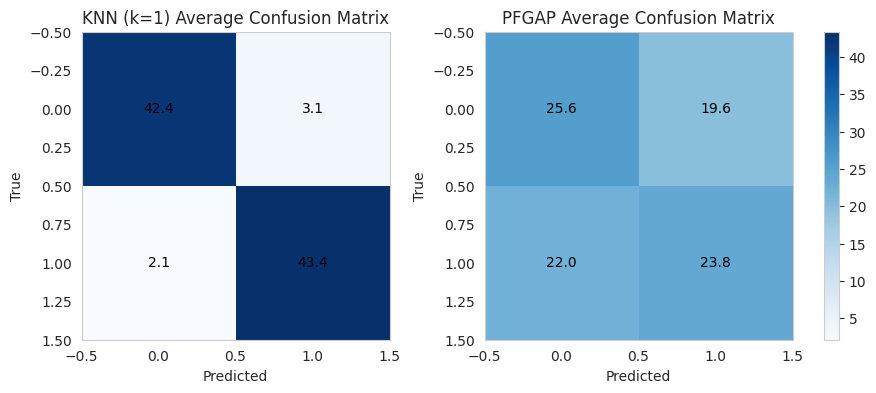

In [ ]:
def plot_average_confusion_matrices():
    """
    Plots the average confusion matrices for KNN (k=1) and PFGAP across all available seeds,
    using a shared colorbar.
    """
    # Helper to average confusion matrices
    def average_confusion(df, col):
        matrices = df[col].dropna().values
        matrices = [np.array(m) for m in matrices if m is not None]
        if not matrices:
            return None
        return np.mean(matrices, axis=0)

    # Average KNN confusion matrices (k=1)
    knn_avg = average_confusion(knn_df, "knn_results_k1_confusion_matrix")
    # Average PFGAP confusion matrices
    pfgap_avg = average_confusion(pfgap_df, "pfgap_euclidean_confusion_matrix")

    # Determine global min/max for color scale
    all_matrices = [m for m in [knn_avg, pfgap_avg] if m is not None]
    vmin = min(m.min() for m in all_matrices)
    vmax = max(m.max() for m in all_matrices)

    fig, axes = plt.subplots(1, 2, figsize=(10, 4), gridspec_kw={'width_ratios': [1, 1], 'wspace': 0.3})

    ims = []
    for ax, avg_mat, title in zip(
        axes,
        [knn_avg, pfgap_avg],
        ["KNN (k=1) Average Confusion Matrix", "PFGAP Average Confusion Matrix"]
    ):
        if avg_mat is not None:
            im = ax.imshow(avg_mat, cmap="Blues", vmin=vmin, vmax=vmax)
            ims.append(im)
            for i in range(avg_mat.shape[0]):
                for j in range(avg_mat.shape[1]):
                    ax.text(j, i, f"{avg_mat[i, j]:.1f}", ha="center", va="center", color="black")
            ax.set_xlabel("Predicted")
            ax.set_ylabel("True")
            ax.set_title(title)
            ax.grid(False)
        else:
            ax.set_visible(False)

    # Shared colorbar for both plots
    fig.colorbar(ims[0], ax=axes, orientation='vertical', fraction=0.04, pad=0.04)
    plt.tight_layout()
    plt.show()

plot_average_confusion_matrices()


In [ ]:
# Convert dict to DataFrame, drop unwanted columns, and expand dictionaries
outlier_df = pd.DataFrame.from_dict(seed_results, orient='index')[["seed", "outlier_scores"]]

for col in outlier_df.columns:
    if outlier_df[col].apply(lambda x: isinstance(x, dict)).any():
        expanded = outlier_df[col].apply(pd.Series)
        expanded = expanded.add_prefix(f"{col}_")
        outlier_df = pd.concat([outlier_df.drop(columns=[col]), expanded], axis=1)

for col in outlier_df.columns:
    if outlier_df[col].apply(lambda x: isinstance(x, dict)).any():
        expanded = outlier_df[col].apply(pd.Series)
        expanded = expanded.add_prefix(f"{col}_")
        outlier_df = pd.concat([outlier_df.drop(columns=[col]), expanded], axis=1)


outlier_df = outlier_df.drop(columns=["outlier_scores_knn_0"]).dropna()

outlier_df

,seed,outlier_scores_pfgap,outlier_scores_knn_k1,outlier_scores_knn_k4,outlier_scores_knn_k8,outlier_scores_knn_k12,outlier_scores_knn_k16,outlier_scores_knn_k20
737,737,"[0.7520358691205588, 1.5666516750588368, 0.001...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.2340020308102542, 4.582605017664969, 0.3547...","[1.035009988970251, 4.328956124369376, 0.32685...","[1.0280698865735738, 4.514265983069524, 0.2126...","[1.1566283655681295, 4.295164939834691, 0.6738...","[1.3328280737479012, 4.714592280886095, 1.1953..."
821,821,"[2.121104978748802, 0.4614243508394433, 3.0117...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.1298585693918937, 1.2764405160727559, 0.504...","[0.8060116640429474, 1.1782859926723066, 0.032...","[1.0926968834822375, 1.0497101875283694, 0.332...","[0.9853506737714229, 0.9855730793188441, 0.221...","[0.9446313240388144, 0.8901268202018072, 0.249..."
982,982,"[1.3563352111095603, 1.5485090509099344, 0.159...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.10266902180592158, 0.7443537017702813, 0.50...","[0.5584254745807818, 1.1067215099766246, 0.260...","[0.7429905484901769, 0.8078729620112605, 0.326...","[0.6594482936616304, 0.6401924647086155, 0.267...","[0.8390912066623084, 0.40954310044625064, 0.25..."
67,67,"[2.121104978748802, 0.4614243508394433, 3.0117...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[6.0869080097575905, 1.0045559627096092, 0.058...","[8.401500034493825, 1.0, 0.05056129715364117, ...","[8.740737373302332, 1.0038627475237536, 0.0, 1...","[8.997599716152656, 0.9033709011799542, 0.0675...","[8.834053688953396, 0.891216874676246, 0.19325..."
78,78,"[6.848823792515511e-05, 7.53805302494917e-05, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.753175390959638, 11.382327333049794, 1.0837...","[1.1019131951211276, 11.442753439143019, 0.600...","[1.0589883676867422, 10.236904205162757, 1.475...","[1.142677988197993, 10.160598686780824, 1.8501...","[1.1189169410008113, 10.001657482911597, 2.110..."


In [ ]:
from Experiment4functions import create_3d_sphere_data
from sklearn.model_selection import train_test_split
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

TRAIN_TEST_SPLIT = 0.7

def plot_outlier_scores(seed):
    data, labels, sphere = create_3d_sphere_data(seed)

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        data, labels, test_size=1-TRAIN_TEST_SPLIT, 
        random_state=seed, stratify=labels
    )

    # Get outlier scores for the given seed
    row = outlier_df[outlier_df['seed'] == seed]
    pfgap_scores = np.array(row['outlier_scores_pfgap'].values[0])
    knn_scores = np.array(row['outlier_scores_knn_k8'].values[0])

    # Normalize scores for marker size
    pfgap_range = np.ptp(pfgap_scores)
    knn_range = np.ptp(knn_scores)
    pfgap_norm = (pfgap_scores - pfgap_scores.min()) / (pfgap_range if pfgap_range > 0 else 1)
    knn_norm = (knn_scores - knn_scores.min()) / (knn_range if knn_range > 0 else 1)
    
    # Create a figure with subplots
    fig = make_subplots(
        rows=1, cols=2,
        specs=[[{'type': 'scene'}, {'type': 'scene'}]],
        subplot_titles=('PFGAP Outlier Scores', 'KNN (k=8) Outlier Scores'),
        horizontal_spacing=0.05
    )
    
    # Add traces for PFGAP
    fig.add_trace(
        go.Scatter3d(
            x=X_train[:, 0],
            y=X_train[:, 1],
            z=X_train[:, 2],
            mode='markers',
            marker=dict(
                size=5 + 15 * pfgap_norm,
                color=y_train,
                colorscale='RdBu',
                opacity=0.8,
                line=dict(width=0.5, color='DarkSlateGrey')
            ),
            text=[f"PFGAP Score: {score:.4f}" for score in pfgap_scores],
            hoverinfo='text',
            name='PFGAP'
        ),
        row=1, col=1
    )
    
    # Add traces for KNN
    fig.add_trace(
        go.Scatter3d(
            x=X_train[:, 0],
            y=X_train[:, 1],
            z=X_train[:, 2],
            mode='markers',
            marker=dict(
                size=5 + 15 * knn_norm,
                color=y_train,
                colorscale='RdBu',
                opacity=0.8,
                line=dict(width=0.5, color='DarkSlateGrey')
            ),
            text=[f"KNN Score: {score:.4f}" for score in knn_scores],
            hoverinfo='text',
            name='KNN'
        ),
        row=1, col=2
    )
    
    # Set identical initial camera position
    camera = dict(eye=dict(x=1.5, y=1.5, z=1.5))
    
    fig.update_layout(
        height=600,
        width=1200,
        title_text=f"Outlier Score Comparison (Seed: {seed})",
        scene=dict(
            xaxis_title="X",
            yaxis_title="Y",
            zaxis_title="Z",
            camera=camera,
            uirevision="same_view"  # Add this to sync camera views
        ),
        scene2=dict(
            xaxis_title="X",
            yaxis_title="Y",
            zaxis_title="Z",
            camera=camera,
            uirevision="same_view"  # Add this to sync camera views
        )
    )
    
    return fig

# Display interactive plot
plot_outlier_scores(737)